In [10]:
!pip install google_images_download

In [0]:
!rm -r ./*

In [0]:
from google_images_download import google_images_download 

In [0]:
response = google_images_download.googleimagesdownload()

In [0]:
arguments = {"keywords":"Swift,Wagon R, Santro, i10","limit":40,"print_urls":True}

In [15]:
paths = response.download(arguments)


Item no.: 1 --> Item name = Swift
Evaluating...
Starting Download...
Image URL: https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/2018_Suzuki_Swift_SZ5_Boosterjet_SHVS_1.0_Front.jpg/1200px-2018_Suzuki_Swift_SZ5_Boosterjet_SHVS_1.0_Front.jpg
Completed Image ====> 1.1200px-2018_Suzuki_Swift_SZ5_Boosterjet_SHVS_1.0_Front.jpg
Image URL: https://www.globalsuzuki.com/img/automobile/lineup/swift/slide/key_img9.jpg
Completed Image ====> 2.key_img9.jpg
Image URL: https://img.etimg.com/photo/39416069/new-2014-maruti-suzuki-swift-to-launch-in-november.jpg
Completed Image ====> 3.new-2014-maruti-suzuki-swift-to-launch-in-november.jpg
Image URL: https://www.globalsuzuki.com/img/automobile/lineup/swiftsport/img.jpg
Completed Image ====> 4.img.jpg
Image URL: https://cdn.motor1.com/images/mgl/o3q8L/s1/2017-suzuki-swift.jpg
Completed Image ====> 5.2017-suzuki-swift.jpg
Image URL: https://upload.wikimedia.org/wikipedia/commons/a/ac/Suzuki_Swift_1.2_Comfort_%28FZ_NZ%29_%E2%80%93_Frontansicht%2C_

In [16]:
print(paths)

({'Swift': ['/content/downloads/Swift/1.1200px-2018_Suzuki_Swift_SZ5_Boosterjet_SHVS_1.0_Front.jpg', '/content/downloads/Swift/2.key_img9.jpg', '/content/downloads/Swift/3.new-2014-maruti-suzuki-swift-to-launch-in-november.jpg', '/content/downloads/Swift/4.img.jpg', '/content/downloads/Swift/5.2017-suzuki-swift.jpg', '/content/downloads/Swift/6.Suzuki_Swift_1.2_Comfort_%28FZ_NZ%29_%E2%80%93_Frontansicht%2C_26._M%C3%A4rz_2011%2C_D%C3%BCsseldorf.jpg', '/content/downloads/Swift/7.key_img3.jpg', '/content/downloads/Swift/8.2017_Suzuki_Swift_%28AZ%29_GLX_Turbo_5-door_hatchback_%282017-07-15%29_01.jpg', '/content/downloads/Swift/9.2019-Suzuki-Swift-Sport-front-three-quarter-5.jpg', '/content/downloads/Swift/10.suzuki-swift-sport-katana.jpg', '/content/downloads/Swift/11.Suzuki_Swift_Sport_2017.jpg', '/content/downloads/Swift/12.two-star-rating.jpg', '/content/downloads/Swift/13.image.jpg', '/content/downloads/Swift/14.2019-suzuki-swift-sport-gets-katana-edition-in-the-netherlands_1.jpeg', '/

In [0]:
from keras.applications.resnet50 import ResNet50, preprocess_input

In [18]:
HEIGHT = 100
WIDTH = 100

base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape=(HEIGHT, WIDTH, 3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [19]:
from keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = "downloads"
BATCH_SIZE = 8

train_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      horizontal_flip=True,
      vertical_flip=True
    )

train_generator = train_datagen.flow_from_directory(TRAIN_DIR, 
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE)

Found 160 images belonging to 4 classes.


In [20]:
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model

def build_finetune_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        # New FC layer, random init
        x = Dense(fc, activation='relu')(x) 
        x = Dropout(dropout)(x)

    # New softmax layer
    predictions = Dense(num_classes, activation='softmax')(x) 
    
    finetune_model = Model(inputs=base_model.input, outputs=predictions)

    return finetune_model

class_list = ["Swift","Wagon R","Santro","i10"]
FC_LAYERS = [1024, 1024]
dropout = 0.5

finetune_model = build_finetune_model(base_model, 
                                      dropout=dropout, 
                                      fc_layers=FC_LAYERS, 
                                      num_classes=len(class_list))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
!mkdir ./checkpoints
!touch ./checkpoints/ResNet50_model_weights.h5

In [22]:
from keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

NUM_EPOCHS = 10
BATCH_SIZE = 8
num_train_images = 10000

adam = Adam(lr=0.00001)
finetune_model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])

filepath="./checkpoints/" + "ResNet50" + "_model_weights.h5"
checkpoint = ModelCheckpoint(filepath, monitor=["acc"], verbose=1, mode='max')
callbacks_list = [checkpoint]

history = finetune_model.fit_generator(train_generator, epochs=NUM_EPOCHS, workers=8, 
                                       steps_per_epoch=num_train_images // BATCH_SIZE, 
                                       shuffle=True, callbacks=callbacks_list)

plot_training(history)

# Plot the training and validation loss + accuracy
def plot_training(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r.')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Training and validation accuracy')
    plt.show()

    plt.savefig('acc_vs_epochs.png')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
  12/1250 [..............................] - ETA: 21:53 - loss: 2.2196 - acc: 0.3125

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


1250/1250 [==============================] - 232s 186ms/step - loss: 1.5041 - acc: 0.4411

Epoch 00001: saving model to ./checkpoints/ResNet50_model_weights.h5
Epoch 2/10
1250/1250 [==============================] - 221s 177ms/step - loss: 0.8839 - acc: 0.6446

Epoch 00002: saving model to ./checkpoints/ResNet50_model_weights.h5
Epoch 3/10
1250/1250 [==============================] - 218s 175ms/step - loss: 0.6298 - acc: 0.7529

Epoch 00003: saving model to ./checkpoints/ResNet50_model_weights.h5
Epoch 4/10
1250/1250 [==============================] - 219s 175ms/step - loss: 0.4301 - acc: 0.8417

Epoch 00004: saving model to ./checkpoints/ResNet50_model_weights.h5
Epoch 5/10
1250/1250 [==============================] - 212s 170ms/step - loss: 0.3231 - acc: 0.8794

Epoch 00005: saving model to ./checkpoints/ResNet50_model_weights.h5
Epoch 6/10
1250/1250 [==============================] - 206s 165ms/step - loss: 0.2391 - acc: 0.9117

Epoch 00006: saving model to ./checkpoints/ResNet50_mo

NameError: ignored

In [0]:
# Plot the training loss + accuracy
def plot_training(history):
    acc = history.history['acc']
    loss = history.history['loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r-', label='accuracy')
    plt.plot(epochs, loss, 'b-', label='loss')
    plt.title('Training accuracy')
    plt.legend()
    plt.show()
    plt.savefig('acc_vs_epochs.png')

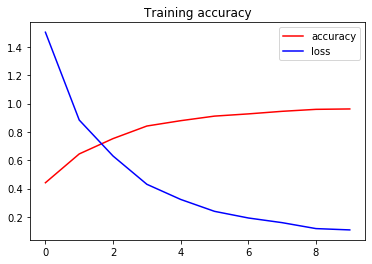

<Figure size 432x288 with 0 Axes>

In [39]:
plot_training(history)

In [0]:
finetune_model.save('cars_model.h5')

In [56]:
!ls -lah

total 487M
drwxr-xr-x 1 root root 4.0K Jan 18 10:01 .
drwxr-xr-x 1 root root 4.0K Jan 18 09:32 ..
-rw-r--r-- 1 root root 1.3K Jan 18 09:32 acc_vs_epochs.png
-rw-r--r-- 1 root root 487M Jan 18 10:01 cars_model.h5
drwxr-xr-x 2 root root 4.0K Jan 18 08:31 checkpoints
drwxr-xr-x 1 root root 4.0K Jan 13 16:38 .config
drwxr-xr-x 6 root root 4.0K Jan 18 08:24 downloads
drwxr-xr-x 2 root root 4.0K Jan 18 10:01 .ipynb_checkpoints


In [42]:
paths[0][' Santro'][0]

'/content/downloads/ Santro/1.Hyundai-Santro-Right-Side-138736.jpg'

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp cars_model.h5 /content/drive/My\ Drive

In [0]:
import cv2

In [0]:
img = cv2.imread(paths[0][' Santro'][0])

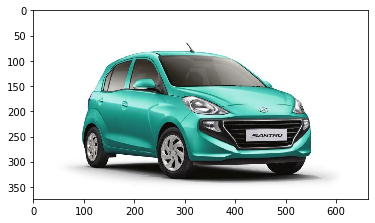

In [46]:
plt.imshow(img)

In [0]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [0]:
img_width, img_height = 100, 100

In [0]:
model = load_model('cars_model.h5')

In [79]:
for i in range(30):
  test_image = image.load_img(paths[0]['Wagon R'][i], target_size=(img_width, img_height))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis=0)
  test_image = test_image.reshape(img_width, img_height,3)
  result = model.predict(test_image.reshape(-1, test_image.shape[0],  test_image.shape[1],  test_image.shape[2]), batch_size=1)
  print(np.argmax(result))

0
3
3
3
0
3
3
3
3
3
3
3
3
3
3
3
0
3
3
0
3
1
3
0
3
0
3
3
0
0


In [0]:
!touch test.txt
!echo "testing \n This is new line" >> test.txt